In [1]:
from sklearn import datasets

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [6]:
cancer = datasets.load_breast_cancer()

In [7]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancer.target_names
#0이 악성, 1이 양성

array(['malignant', 'benign'], dtype='<U9')

In [12]:
cancer.target[0]

0

In [13]:
y=cancer.target

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
X=cancer.data

In [18]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [19]:
clf = DecisionTreeClassifier()

In [20]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
new_patient=[
    [0.33, 0.01, 0.07, 0.1, 0.8, 0.02, 
     0.1, 0.01, 0.2, 0.3, 0.01, 0.03,
     0.1, 0.3, 0.2, 0.8, 0.9, 0.7, 
    0.1, 0.3, 0.8, 0.7, 0.5, 0.4, 0.7, 0.8, 0.5, 0.6, 0.4, 0.3]
]

In [22]:
clf.predict(new_patient)

array([0])

In [23]:
from sklearn import tree

In [24]:
from IPython.display import Image

In [25]:
import pydotplus

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [32]:
dt_dot_data = tree.export_graphviz(
    clf, 
    feature_names=cancer.feature_names,
    class_names=cancer.target_names
)

In [39]:
import os

In [42]:
os.environ["PATH"]+=os.pathsep+"C:/ai/program/Graphviz/bin/"

In [43]:
pydotplus.graph_from_dot_data(dt_dot_data).create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\n\x8f\x00\x00\x04\xbc\x08\x06\x00\x00\x00Wm\x81\x07\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd\x7f\x8c\x9c\xf5\x9d\x1f\xf0\xf7\x84\x1fMJ\xd2\xddD\xd4\x9b\xe2t\xb9\xb6\xa9\x11U\xc5\xa2D\x97\x9a\x98@\xb1I8\x8cf\xb8\xd3a\xe4u\x83r\x11\xb6\xb5\xdb\xda\x15\xc4\xbe\x16r;\xb2\xd2]\x1d\x91n7\xa42\xd7\xb5\xbc\x11-2\xd8SLza\xa7\x1cU\x0b\xeb\x98\xf0\xc3\xc7\x1d9\xef\x1f)\xa9u\xf1\xb1[\x9c\xdc\x8e\xb8\x8bW!\x17DH\xa6\x7f\xb83\xd9\xb5\xd7\xbf\xf0\xda\x83\xbd\xaf\x974\xf2\xcc\xf3\xfd>\xdf\xe7\xf3\xcc\xf2H\x89\xf6\xbd\x9fo\xa1^\xaf\xd7\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0B\xb0\xe1}\xad\xae\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80sGx\x14\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x01\x11\x1e\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00X@.nu\x01\x00\x00\x00\x00\x00\x00p>z\xe9\xa5\x97\xf2\xfa\xeb\xaf\xb7\xba\x0cxO\xb8\xe8\xa2\x8bR*\x95r\xf1\xc5~\x05\r\x00\x00\xe7\x83B\xbd^\xaf\xb7\xba\x08\x00\x00\x00\x00\x00\x008

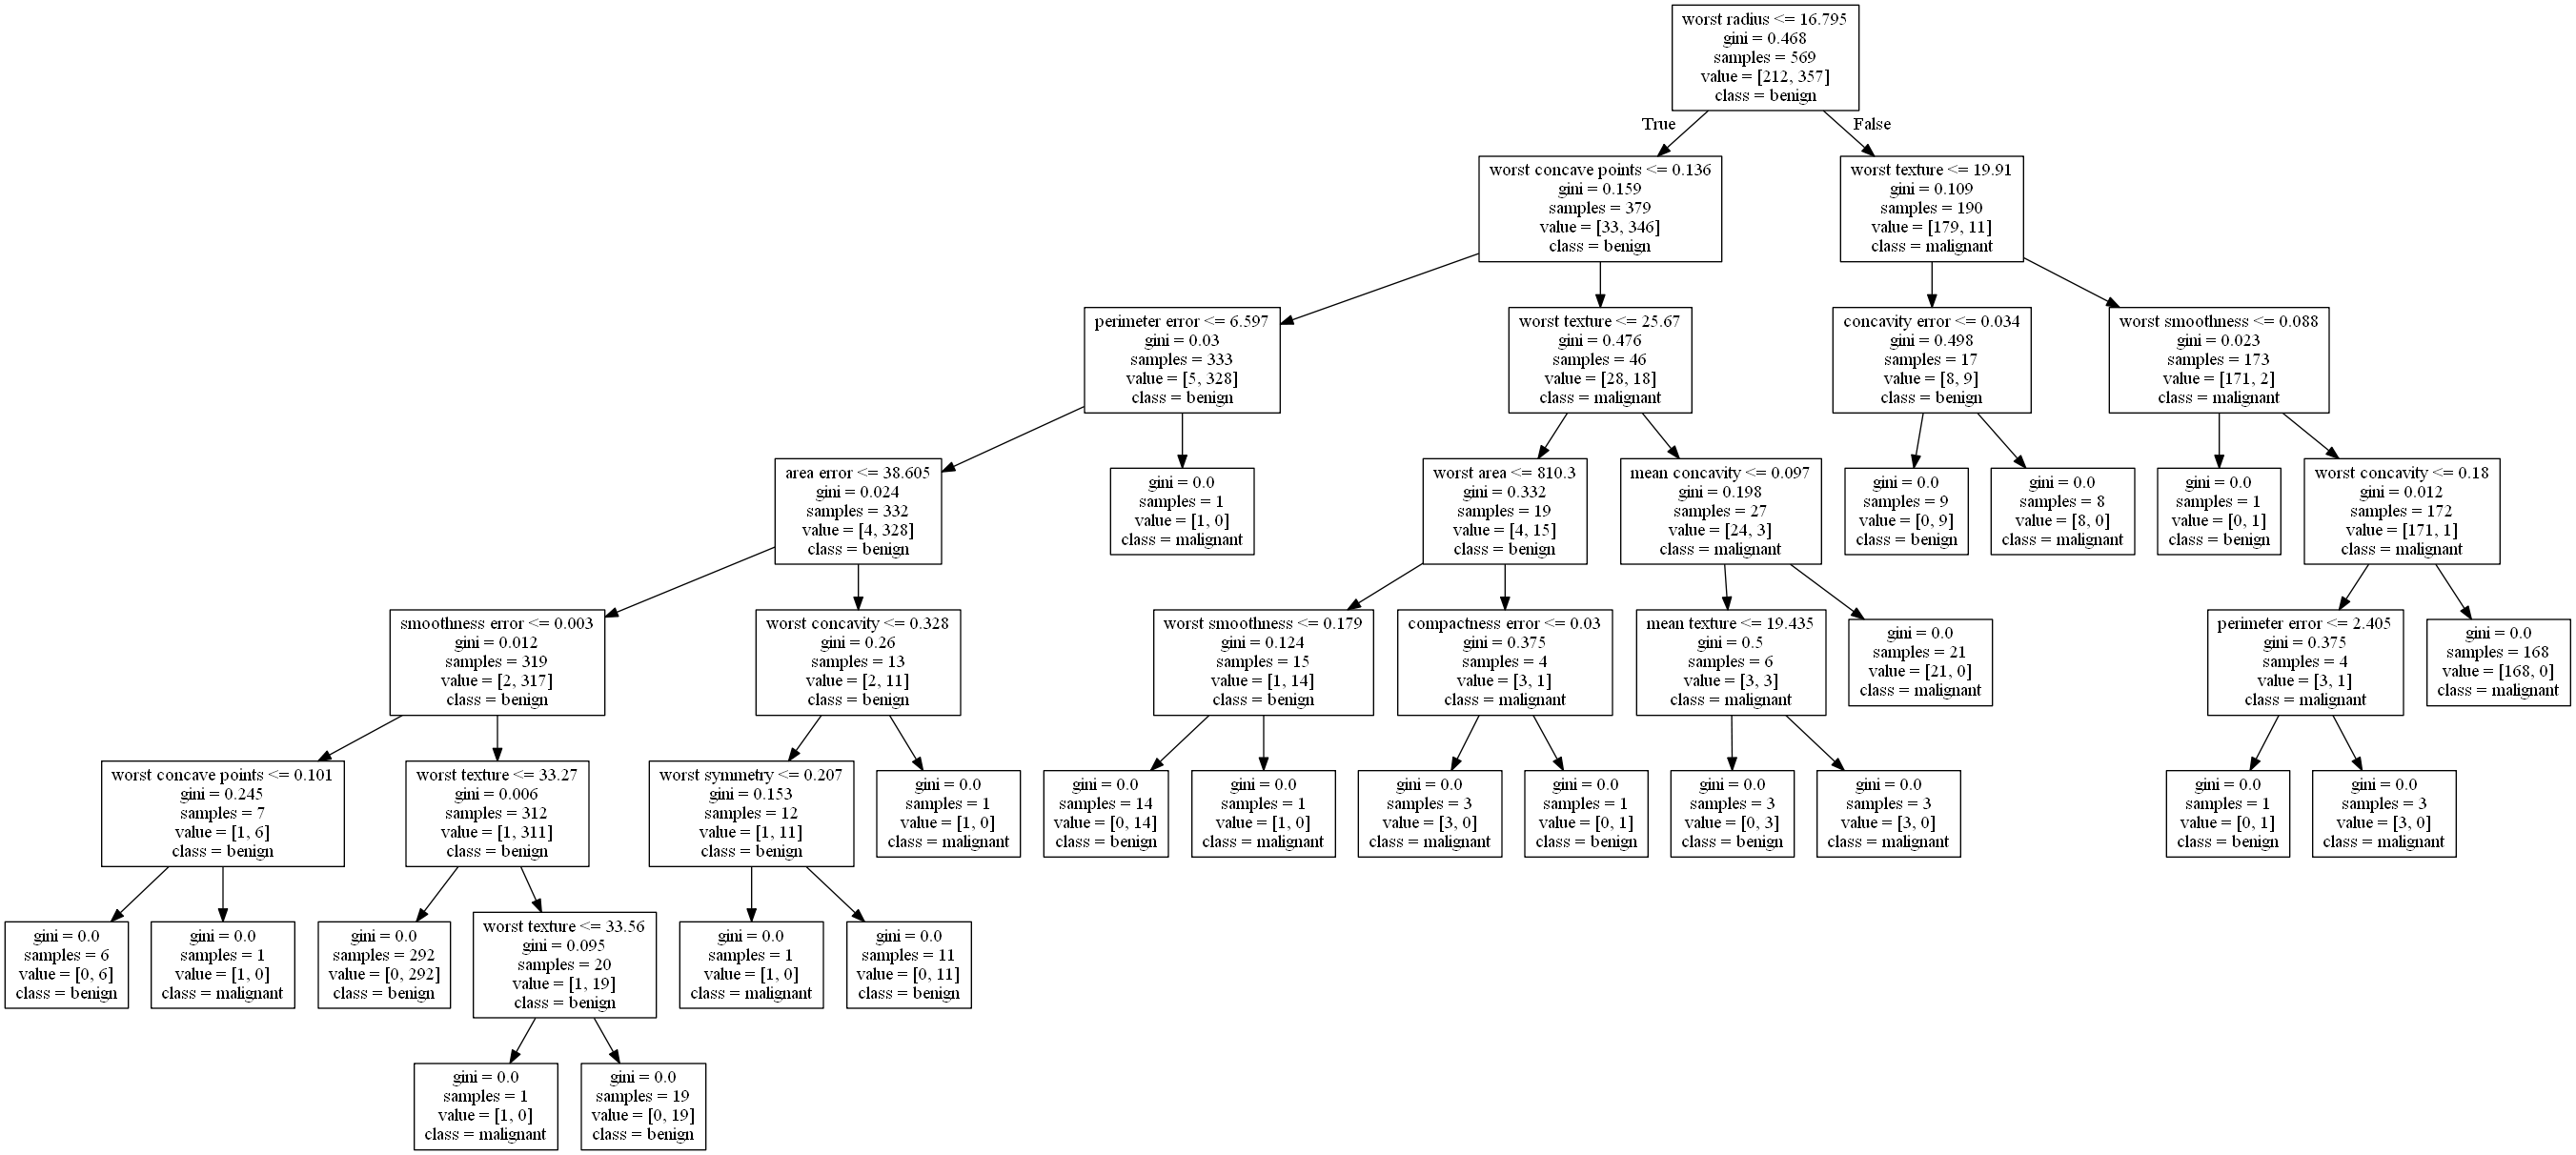

In [45]:
Image(pydotplus.graph_from_dot_data(dt_dot_data).create_png())

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_train

array([[9.676e+00, 1.314e+01, 6.412e+01, ..., 1.075e-01, 2.848e-01,
        1.364e-01],
       [1.447e+01, 2.499e+01, 9.581e+01, ..., 1.205e-01, 3.187e-01,
        1.023e-01],
       [2.329e+01, 2.667e+01, 1.589e+02, ..., 2.733e-01, 3.198e-01,
        8.762e-02],
       ...,
       [1.613e+01, 2.068e+01, 1.081e+02, ..., 2.073e-01, 3.706e-01,
        1.142e-01],
       [1.440e+01, 2.699e+01, 9.225e+01, ..., 5.563e-02, 2.345e-01,
        6.464e-02],
       [1.419e+01, 2.381e+01, 9.287e+01, ..., 1.772e-01, 4.724e-01,
        1.026e-01]])

In [48]:
clf = DecisionTreeClassifier()

In [49]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
clf.predict(new_patient)

array([0])

In [51]:
y_pred=clf.predict(X_test)

In [52]:
import pandas as pd

In [54]:
tennis_data = pd.read_csv("playtennis.csv", encoding="utf-8")

In [55]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny", 0)

In [56]:
tennis_data.Outlook = tennis_data.Outlook.replace("Overcast", 1)
tennis_data.Outlook = tennis_data.Outlook.replace("Rain", 2)
tennis_data.Temperature = tennis_data.Temperature.replace("Hot", 1)
tennis_data.Temperature = tennis_data.Temperature.replace("Mild", 2)
tennis_data.Temperature = tennis_data.Temperature.replace("Cool", 3)
tennis_data.Humidity = tennis_data.Humidity.replace("High", 1)
tennis_data.Humidity = tennis_data.Humidity.replace("Normal", 2)
tennis_data.Wind = tennis_data.Wind.replace("Weak", 1)
tennis_data.Wind = tennis_data.Wind.replace("Strong", 2)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No", 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("Yes", 2)

In [57]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [58]:
pd.DataFrame(tennis_data, columns=["Outlook", "Temperature", 
                                  "Humidity", "Wind"])

,Outlook,Temperature,Humidity,Wind
0,0,1,1,1
1,0,1,1,2
2,1,1,1,1
3,2,2,1,1
4,2,3,2,1
5,2,3,2,2
6,1,3,2,2
7,0,2,1,1
8,0,3,2,1
9,2,2,2,1


In [59]:
import numpy as np

In [60]:
X = np.array(
pd.DataFrame(tennis_data, columns=["Outlook", "Temperature", 
                                  "Humidity", "Wind"]))

In [61]:
y= np.array(pd.DataFrame(tennis_data, columns = ["PlayTennis"]))

In [62]:
train_test_split(X, y)

[array([[1, 1, 2, 1],
        [0, 3, 2, 1],
        [2, 3, 2, 2],
        [2, 2, 2, 1],
        [0, 1, 1, 1],
        [1, 3, 2, 2],
        [2, 2, 1, 2],
        [0, 1, 1, 2],
        [0, 2, 1, 1],
        [0, 2, 2, 2]], dtype=int64), array([[1, 2, 1, 2],
        [2, 2, 1, 1],
        [2, 3, 2, 1],
        [1, 1, 1, 1]], dtype=int64), array([[2],
        [2],
        [1],
        [2],
        [1],
        [2],
        [1],
        [1],
        [1],
        [2]], dtype=int64), array([[2],
        [2],
        [2],
        [2]], dtype=int64)]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
dt_clf = DecisionTreeClassifier()

In [69]:
dt_clf = dt_clf.fit(X_train, y_train)

In [70]:
tennis_data.columns.tolist()[:4]

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [73]:
dt_dot_data = tree.export_graphviz(dt_clf, 
                     feature_names=tennis_data.columns.tolist()[:4],
                     class_names = ["No", "Yes"], filled = True
                    )

In [74]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

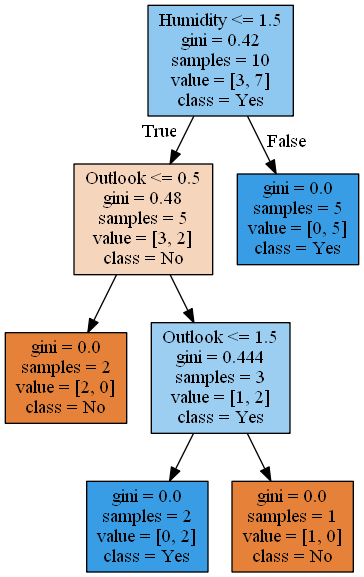

In [76]:
Image(dt_graph.create_png())

In [77]:
dt_predict = dt_clf.predict(X_test)

In [78]:
dt_predict

array([2, 1, 2, 1], dtype=int64)

In [79]:
confusion_matrix(y_test, dt_predict)

array([[1, 1],
       [1, 1]], dtype=int64)

In [80]:
accuracy = accuracy_score(y_test, dt_predict)

In [81]:
print(accuracy)

0.5


In [82]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [83]:
cancer = datasets.load_breast_cancer()

In [84]:
X = cancer.data
y = cancer.target

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
clf = DecisionTreeClassifier()

In [87]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
y_pred = clf.predict(X_test)

In [89]:
confusion_matrix(y_test, y_pred)

array([[35,  2],
       [ 2, 75]], dtype=int64)

In [91]:
accuracy_score(y_test, y_pred, normalize = True)

0.9649122807017544

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.97      0.97      0.97        77

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [93]:
y_test - y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [94]:
np.sum((y_test - y_pred)**2)

4

In [95]:
np.sum((y_test - y_pred)**2) / len(y_test)

0.03508771929824561

In [96]:
skf = StratifiedKFold(n_splits=10)

In [97]:
skf.get_n_splits(X, y)

10

In [98]:
for train_index, test_index in skf.split(X, y) :
    print(train_index)
    print("=" * 70)
    print(test_index)

[ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 30

In [99]:
clf = DecisionTreeClassifier()

In [101]:
scores = cross_val_score(clf, X, y, cv=skf)
print(scores)
print(scores.mean())

[0.93103448 0.87931034 0.92982456 0.87719298 0.94736842 0.89473684
 0.9122807  0.94642857 0.91071429 0.94642857]
0.9175319764929565
